In [50]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['GOOGLE_API_KEY']=os.getenv("GOOGLE_API_KEY")
os.environ['HF_TOKEN']=os.getenv("HF_TOKEN")
## Langsmith Tracking
os.environ["LANGCHAIN_API_KEY"]=os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]=os.getenv("LANGCHAIN_PROJECT")

# RAG -Follow

## Concept

Link: https://python.langchain.com/v0.2/docs/tutorials/rag/#what-is-rag

**Indexing**

1. **Load:** First we need to load our data. This is done with Document Loaders.
2. **Split:** Text splitters break large Documents into smaller chunks. This is useful both for indexing data and for passing it in to a model, since large chunks are harder to search over and won't fit in a model's finite context window.
3. **Store:** We need somewhere to store and index our splits, so that they can later be searched over. This is often done using a VectorStore and Embeddings model.

**Retrieval and generation**

4. **Retrieve:** Given a user input, relevant splits are retrieved from storage using a Retriever.
5. **Generate:** A ChatModel / LLM produces an answer using a prompt that includes the question and the retrieved data

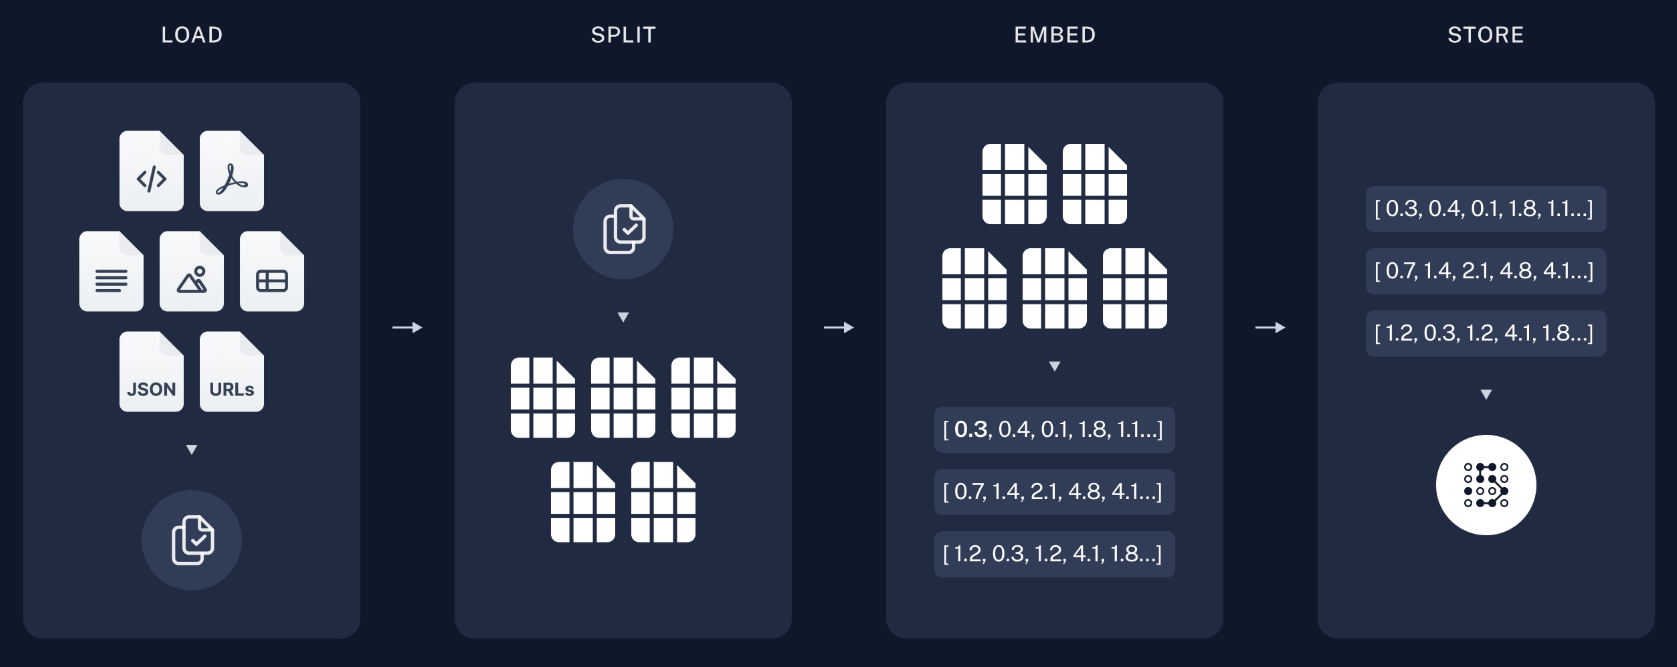

### 1. Load

Link: https://python.langchain.com/v0.2/docs/integrations/document_loaders/

In [23]:
from langchain_community.document_loaders import WikipediaLoader

docs = WikipediaLoader(query="Kardashev scale", load_max_docs=2).load()

len(docs)

2

In [25]:
print(docs[0].metadata['summary'])

The Kardashev scale (Russian: шкала Кардашёва, romanized: shkala Kardashyova) is a method of measuring a civilization's level of technological advancement based on the amount of energy it is capable of harnessing and using. The measure was proposed by Soviet astronomer Nikolai Kardashev in 1964, and was named after him.
Kardashev first outlined his scale in a paper presented at the 1964 conference that communicated findings on BS-29-76, Byurakan Conference in the Armenian SSR (which he initiated), a scientific meeting that reviewed the Soviet radio astronomy space listening program. The paper was titled "Передача информации внеземными цивилизациями" ("Transmission of Information by Extraterrestrial Civilizations"). Starting from a functional definition of civilization, based on the immutability of physical laws and using human civilization as a model for extrapolation, Kardashev's initial model was developed. He proposed a classification of civilizations into three types, based on the 

In [26]:
print(docs[1].metadata['summary'])

Nikolai Semyonovich Kardashev (Russian: Никола́й Семёнович Кардашёв, romanized: Nikolay Semyonovich Kardashyov, IPA: [nʲɪkɐˈlaj sʲɪˈmʲɵnəvʲɪtɕ kərdɐˈʂof]; April 25, 1932 – August 3, 2019) was a Soviet and Russian astrophysicist best known for the Kardashev scale, which measures a civilization's status in technological evolution based on the amount of energy it is capable of harnessing and using. He was also the deputy director of the Astro Space Center of the Lebedev Physical Institute of the Russian Academy of Sciences.


In [27]:
# document = docs[0].metadata['summary'] + docs[1].metadata['summary']
# print(document)

### 2. Split

Link: https://python.langchain.com/v0.1/docs/modules/data_connection/document_transformers/

In [33]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)

In [35]:
splits

[Document(metadata={'title': 'Kardashev scale', 'summary': 'The Kardashev scale (Russian: шкала Кардашёва, romanized: shkala Kardashyova) is a method of measuring a civilization\'s level of technological advancement based on the amount of energy it is capable of harnessing and using. The measure was proposed by Soviet astronomer Nikolai Kardashev in 1964, and was named after him.\nKardashev first outlined his scale in a paper presented at the 1964 conference that communicated findings on BS-29-76, Byurakan Conference in the Armenian SSR (which he initiated), a scientific meeting that reviewed the Soviet radio astronomy space listening program. The paper was titled "Передача информации внеземными цивилизациями" ("Transmission of Information by Extraterrestrial Civilizations"). Starting from a functional definition of civilization, based on the immutability of physical laws and using human civilization as a model for extrapolation, Kardashev\'s initial model was developed. He proposed a 

In [ ]:
print(splits[0].page_content)
print(splits[1].page_content)

The Kardashev scale (Russian: шкала Кардашёва, romanized: shkala Kardashyova) is a method of measuring a civilization's level of technological advancement based on the amount of energy it is capable of harnessing and using. The measure was proposed by Soviet astronomer Nikolai Kardashev in 1964, and was named after him.
Kardashev first outlined his scale in a paper presented at the 1964 conference that communicated findings on BS-29-76, Byurakan Conference in the Armenian SSR (which he initiated), a scientific meeting that reviewed the Soviet radio astronomy space listening program. The paper was titled "Передача информации внеземными цивилизациями" ("Transmission of Information by Extraterrestrial Civilizations"). Starting from a functional definition of civilization, based on the immutability of physical laws and using human civilization as a model for extrapolation, Kardashev's initial model was developed. He proposed a classification of civilizations into three types, based on the 

### 3. Store



#### 3.1. Embeddings

Link: https://huggingface.co/Xenova/all-MiniLM-L6-v2

In [60]:
# Embeddings
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

In [61]:
query = embeddings.embed_query("Tamil Nadu")
query

[-0.06938417255878448,
 -0.00374650489538908,
 -0.009815174154937267,
 0.0390290804207325,
 -0.06086527556180954,
 -0.03207366541028023,
 0.005238579120486975,
 0.02919301949441433,
 -0.033171623945236206,
 0.01802349090576172,
 0.013522832654416561,
 -0.13772767782211304,
 0.050278473645448685,
 0.02816135436296463,
 -0.04108015447854996,
 -0.01574627496302128,
 0.01552147138863802,
 -0.05427112057805061,
 0.0586404874920845,
 -0.06321520358324051,
 -0.0322614461183548,
 0.07618512958288193,
 -0.009968530386686325,
 -0.04909379407763481,
 0.0770198404788971,
 -0.004352431278675795,
 0.04612366855144501,
 -0.04110841453075409,
 -0.018409743905067444,
 -0.019370604306459427,
 0.05358714610338211,
 0.0476168729364872,
 -0.04246791824698448,
 0.02546771615743637,
 -0.024953199550509453,
 -0.020263547077775,
 -0.0751258060336113,
 -0.006356893572956324,
 0.06040153652429581,
 -0.019544845446944237,
 -0.03698228299617767,
 0.024134604260325432,
 0.012163825333118439,
 -0.06154647096991539,


In [62]:
len(query)

384

In [57]:
from langchain_ollama import OllamaEmbeddings

embeddings = OllamaEmbeddings(model="llama3.2:1b")

In [58]:
query = embeddings.embed_query("Tamil Nadu")
query

[0.01849038,
 0.01866458,
 -0.010031378,
 0.011373717,
 0.043480046,
 -0.012972912,
 0.012276616,
 0.011437344,
 -0.011377835,
 0.021715054,
 0.0015659744,
 0.014467013,
 -0.0218216,
 -0.011643345,
 0.001300936,
 0.0005991546,
 -0.024022149,
 -0.013229166,
 0.030005032,
 -0.012346502,
 -0.021401526,
 0.002957677,
 0.00074669713,
 -0.018406028,
 0.020913167,
 0.0013512837,
 -0.01801772,
 -0.009281617,
 0.024403838,
 0.03651989,
 0.015294974,
 0.0038675002,
 0.014362667,
 0.03779257,
 -0.014336794,
 0.03562641,
 0.048845753,
 -0.006109934,
 -0.0030777855,
 0.001729162,
 -0.00089190726,
 0.0028793428,
 0.009591635,
 0.039457172,
 -0.012355696,
 -0.006927495,
 0.047203973,
 -0.026426349,
 0.0030822465,
 -0.025248645,
 0.019419331,
 -0.015250875,
 -0.010540924,
 -0.004071289,
 -0.019468358,
 0.012316849,
 0.01415017,
 -0.0112984795,
 0.009359224,
 -0.015045519,
 -0.026497556,
 -0.01481852,
 -0.024971772,
 -0.005911171,
 0.008793516,
 -0.019046772,
 0.002635284,
 0.026704961,
 0.012985398,
 

In [59]:
len(query)

2048

#### 3.2. Vectorstores

Link: https://python.langchain.com/v0.2/docs/integrations/vectorstores/

In [63]:
from langchain_community.vectorstores import FAISS
vectorstores_db = FAISS.from_documents(splits, embeddings)

In [64]:
vectorstores_db

#### similarity_search

In [65]:
## query it
query = "Kardashev first outlined his scale in a paper presented at?"
docs = vectorstores_db.similarity_search(query)
docs[0].page_content

"The Kardashev scale (Russian: шкала Кардашёва, romanized: shkala Kardashyova) is a method of measuring a civilization's level of technological advancement based on the amount of energy it is capable of harnessing and using. The measure was proposed by Soviet astronomer Nikolai Kardashev in 1964, and was named after him."

### 4. Retrieve

In [67]:
retriever = vectorstores_db.as_retriever()

### 5. Generate

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_google_genai import ChatGoogleGenerativeAI

# Create llm
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

# Incorporate the retriever into a question-answering chain.
system_prompt = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer "
    "the question. If you don't know the answer, say that you "
    "don't know. Use three sentences maximum and keep the "
    "answer concise."
    "\n\n"
    "{context}"
)

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)

# Create a chain for passing a list of Documents to a model.
# https://api.python.langchain.com/en/latest/chains/langchain.chains.combine_documents.stuff.create_stuff_documents_chain.html
question_answer_chain = create_stuff_documents_chain(llm, prompt)

# Create retrieval chain that retrieves documents and then passes them on.
# https://python.langchain.com/api_reference/langchain/chains/langchain.chains.retrieval.create_retrieval_chain.html
rag_chain = create_retrieval_chain(retriever, question_answer_chain)

In [72]:
response = rag_chain.invoke({"input": "Kardashev scale?"})
print(response["answer"])

The Kardashev scale measures a civilization's technological advancement based on its energy consumption.  It was proposed by Soviet astronomer Nikolai Kardashev in 1964.  The scale categorizes civilizations into types I, II, and III, based on their ability to harness planetary, stellar, and galactic energy respectively.


## Overall Code

In [73]:
from langchain_community.document_loaders import WikipediaLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_google_genai import ChatGoogleGenerativeAI

# 1. Load, Split, Store and Retrive the content
docs = WikipediaLoader(query="Kardashev scale", load_max_docs=2).load()
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
vectorstores_db = FAISS.from_documents(splits, embeddings)
retriever = vectorstores_db.as_retriever()

# 2. Incorporate the retriever into a question-answering chain.
## Create llm
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

## Incorporate the retriever into a question-answering chain.
system_prompt = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer "
    "the question. If you don't know the answer, say that you "
    "don't know. Use three sentences maximum and keep the "
    "answer concise."
    "\n\n"
    "{context}"
)

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)

## Create a chain for passing a list of Documents to a model.
## https://api.python.langchain.com/en/latest/chains/langchain.chains.combine_documents.stuff.create_stuff_documents_chain.html
question_answer_chain = create_stuff_documents_chain(llm, prompt)

## Create retrieval chain that retrieves documents and then passes them on.
## https://python.langchain.com/api_reference/langchain/chains/langchain.chains.retrieval.create_retrieval_chain.html
rag_chain = create_retrieval_chain(retriever, question_answer_chain)

In [74]:
response = rag_chain.invoke({"input": "Kardashev scale?"})
print(response["answer"])

The Kardashev scale measures a civilization's technological advancement based on its energy consumption.  Proposed by Nikolai Kardashev in 1964, it categorizes civilizations into types I, II, and III based on whether they can harness the energy of a planet, star, or galaxy, respectively.
